<a href="https://colab.research.google.com/github/dishang8/Neural_Network_for_Sentiment_Classification/blob/main/Task_3_Neural_Network_for_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [6]:
from google.colab import files
uploaded = files.upload()

Saving 3) Sentiment dataset.csv to 3) Sentiment dataset.csv


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.2278 - loss: 1.6066 - val_accuracy: 0.5455 - val_loss: 1.5937
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3944 - loss: 1.5813 - val_accuracy: 0.4545 - val_loss: 1.5551
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4974 - loss: 1.5238 - val_accuracy: 0.4545 - val_loss: 1.4681
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4687 - loss: 1.4050 - val_accuracy: 0.4545 - val_loss: 1.3880
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5047 - loss: 1.3160 - val_accuracy: 0.5455 - val_loss: 1.2834
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5866 - loss: 1.2012 - val_accuracy: 0.5000 - val_loss: 1.1577
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5881 - loss: 1.1005 - val_accuracy: 0.5455 - val_loss: 1.1498
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5759 - loss: 1.1572 - val_accuracy: 0.5000 - val_loss: 1.1263
Epoch 9

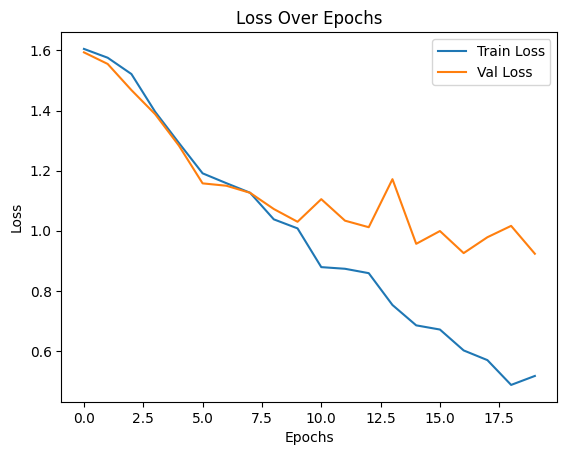

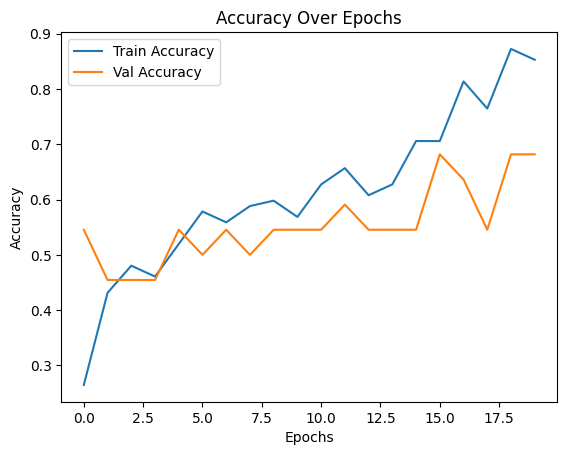

In [7]:
# Load dataset
df = pd.read_csv("3) Sentiment dataset.csv")

# Keep top 5 classes
top_labels = df['Sentiment'].value_counts().nlargest(5).index
df = df[df['Sentiment'].isin(top_labels)]

# Label encode
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])

# Tokenization
texts = df['Text'].astype(str).tolist()
labels = df['label'].tolist()
tokenizer = Tokenizer(num_words=5000, oov_token="")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_len = max(len(x) for x in sequences)
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(labels)

# Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model
vocab_size = len(tokenizer.word_index) + 1
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stop])

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [8]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Get only the classes that actually appear in y_test
present_labels = np.unique(y_true)
present_class_names = le.inverse_transform(present_labels)

print(classification_report(y_true, y_pred, labels=present_labels, target_names=present_class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
              precision    recall  f1-score   support

 Excitement        0.00      0.00      0.00         4
      Happy        0.00      0.00      0.00         5
        Joy        0.25      0.50      0.33         4
  Positive         0.90      1.00      0.95         9

    accuracy                           0.50        22
   macro avg       0.29      0.38      0.32        22
weighted avg       0.41      0.50      0.45        22



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


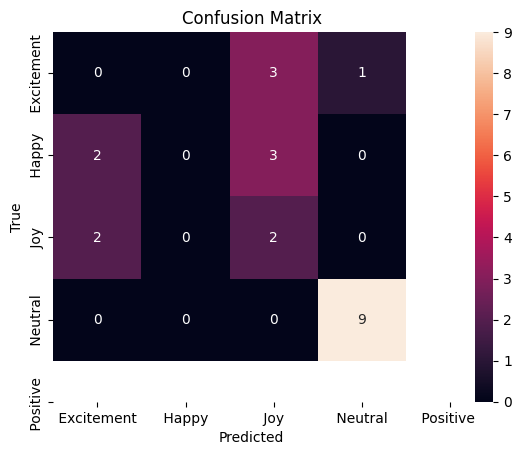

In [9]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [10]:
from sklearn.utils import class_weight

y_int = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_int), y=y_int)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8445 - loss: 0.7046 - val_accuracy: 0.6818 - val_loss: 0.8646
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8738 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 1.0508
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8784 - loss: 0.6943 - val_accuracy: 0.5455 - val_loss: 0.9803
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8871 - loss: 0.7052 - val_accuracy: 0.6818 - val_loss: 0.8601
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8605 - loss: 0.5403 - val_accuracy: 0.6364 - val_loss: 1.1427
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9207 - loss: 0.4733 - val_accuracy: 0.6818 - val_loss: 0.8565
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8743 - loss: 0.5469 - val_accuracy: 0.6818 - val_loss: 0.9286
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9695 - loss: 0.3368 - val_accuracy: 0.5455 - val_loss: 1.1599


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Classification Report:
               precision    recall  f1-score   support

 Excitement        0.17      0.25      0.20         4
      Happy        0.00      0.00      0.00         5
        Joy        0.50      0.75      0.60         4
  Positive         0.90      1.00      0.95         9

    accuracy                           0.59        22
   macro avg       0.39      0.50      0.44        22
weighted avg       0.49      0.59      0.53        22



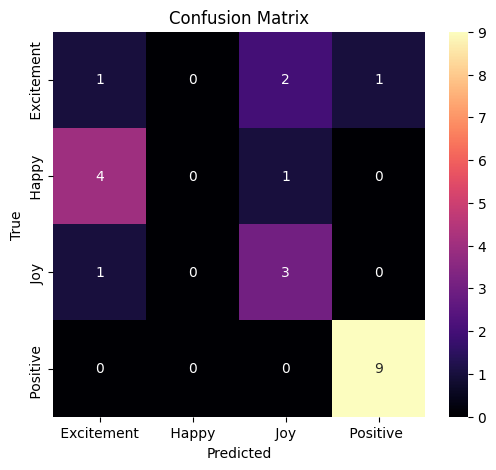

In [11]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get correct label names
true_labels = np.unique(y_true)
target_names = le.inverse_transform(true_labels)

# Classification report
report = classification_report(y_true, y_pred, target_names=target_names, zero_division=0)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()